In [13]:
import pandas as pd

df = pd.read_csv('/home/mukundvinayak/machine-learning/Concrete_mixing_analysis/preprocessed_concrete_mixing_entries.csv')

df.shape
df.head()


,binder(kg/m3),pozzolan(kg/m3),fine_aggregate(kg/m3),water(kg/m3),foaming_agent(kg/m3),measured_density(kg/m3),period_of_testing(Days),compressive_strength(MPa)
0,420.0,0.0,0.0,168.0,39.4,629.0,28,1.77
1,411.0,0.0,0.0,186.0,38.5,631.0,28,2.07
2,149.0,302.0,0.0,190.0,35.8,678.0,28,1.09
3,311.0,0.0,0.0,141.0,44.3,497.0,28,0.71
4,57.0,268.0,885.0,163.0,20.0,1396.0,28,0.25


In [14]:
target = "compressive_strength(MPa)"
features = [c for c in df.columns if c != target]

len(features), features


(7,
 ['binder(kg/m3)',
  'pozzolan(kg/m3)',
  'fine_aggregate(kg/m3)',
  'water(kg/m3)',
  'foaming_agent(kg/m3)',
  'measured_density(kg/m3)',
  'period_of_testing(Days)'])

In [15]:
df[target].describe()

# min>= 0
# no NaN values

count    1006.000000
mean       11.027503
std        11.702431
min         0.000000
25%         2.502500
50%         5.660000
75%        15.505000
max        48.880000
Name: compressive_strength(MPa), dtype: float64

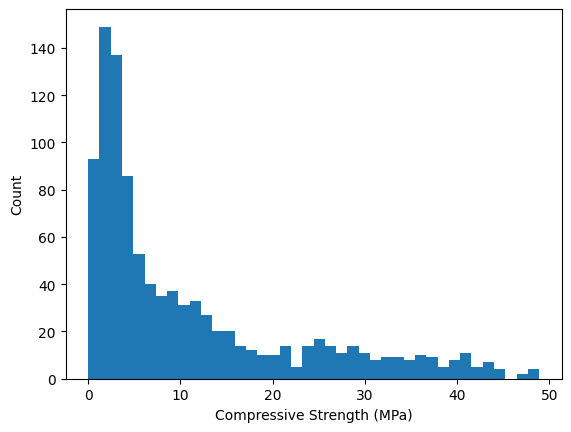

In [16]:
# visualization

import matplotlib.pyplot as plt

plt.hist(df[target], bins=40)
plt.xlabel("Compressive Strength (MPa)")
plt.ylabel("Count")
plt.show()


In [17]:
#missing values?

df.isna().sum().sort_values(ascending=False)

binder(kg/m3)                0
pozzolan(kg/m3)              0
fine_aggregate(kg/m3)        0
water(kg/m3)                 0
foaming_agent(kg/m3)         0
measured_density(kg/m3)      0
period_of_testing(Days)      0
compressive_strength(MPa)    0
dtype: int64

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
binder(kg/m3),1006.0,484.697356,211.249159,57.00,312.5000,447.30,661.2250,992.80
pozzolan(kg/m3),1006.0,40.473449,94.425645,0.00,0.0000,0.00,32.0000,787.00
fine_aggregate(kg/m3),1006.0,609.461412,262.764287,0.00,426.6000,678.30,763.9000,1355.00
water(kg/m3),1006.0,232.458592,84.686023,68.90,169.0000,232.35,290.4000,484.00
foaming_agent(kg/m3),1006.0,22.224990,12.272712,0.17,12.8800,22.50,31.0000,60.00
measured_density(kg/m3),1006.0,1342.376998,428.414500,497.00,1000.0000,1400.00,1723.7775,2009.48
period_of_testing(Days),1006.0,27.198807,32.856211,3.00,7.0000,28.00,28.0000,180.00
compressive_strength(MPa),1006.0,11.027503,11.702431,0.00,2.5025,5.66,15.5050,48.88


In [19]:
df.duplicated().sum()

np.int64(11)

In [20]:
df = df.drop_duplicates().reset_index(drop=True)

In [21]:
df[features].duplicated().sum()


np.int64(166)

In [22]:
corr = df.corr(numeric_only=True)[target].sort_values(ascending=False)
corr


compressive_strength(MPa)    1.000000
binder(kg/m3)                0.783861
measured_density(kg/m3)      0.700667
fine_aggregate(kg/m3)        0.436226
water(kg/m3)                 0.415444
period_of_testing(Days)     -0.096663
pozzolan(kg/m3)             -0.145047
foaming_agent(kg/m3)        -0.291285
Name: compressive_strength(MPa), dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((796, 7), (199, 7), (796,), (199,))

In [24]:
df.shape

(995, 8)

In [ ]:
# saving the processed data
df.to_csv('/home/mukundvinayak/machine-learning/Concrete_mixing_analysis/final_concrete_dataset.csv', index=False)

In [26]:
"completed auditing"

'completed auditing'